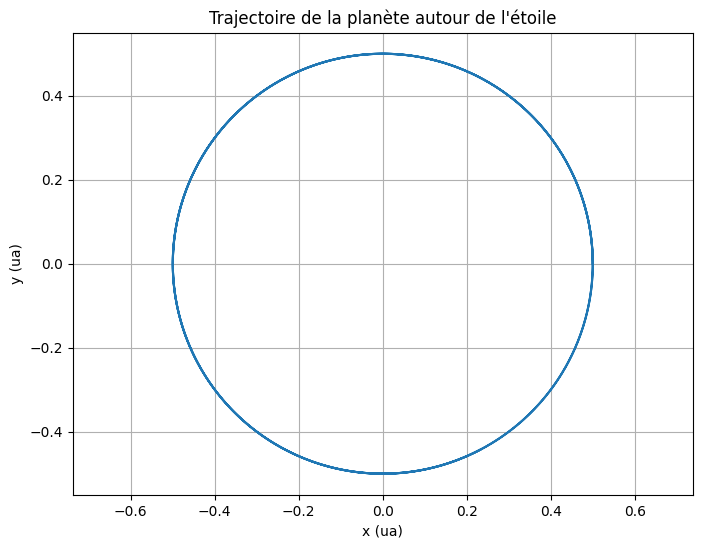

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de la simulation
G = 4 * np.pi**2  # Constante gravitationnelle dans les unités astronomiques
dt = 0.001        # Pas de temps
T = 1             # Période d'une année
N = int(T / dt)   # Nombre d'itérations pour couvrir une période

# Arrays pour stocker les positions et vitesses
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Conditions initiales
x[0] = 1  # position x initiale au périhélie
y[0] = 0    # position y initiale
vx[0] = 0   # vitesse initiale en x
vy[0] = np.sqrt(G / x[0])  # vitesse initiale en y pour une orbite elliptique

# Méthode d'Euler-Richardson pour résoudre les équations du mouvement
for n in range(N-1):
    r = np.sqrt(x[n]**2 + y[n]**2)
    
    # Prédiction
    vx_temp = vx[n] - (G * x[n] / r**3) * dt
    vy_temp = vy[n] - (G * y[n] / r**3) * dt
    x_temp = x[n] + vx_temp * dt
    y_temp = y[n] + vy_temp * dt
    
    # Correction
    r_temp = np.sqrt(x_temp**2 + y_temp**2)
    vx[n+1] = vx[n] - 0.5 * ( (G * x[n] / r**3) + (G * x_temp / r_temp**3) ) * dt
    vy[n+1] = vy[n] - 0.5 * ( (G * y[n] / r**3) + (G * y_temp / r_temp**3) ) * dt
    x[n+1] = x[n] + 0.5 * (vx[n] + vx[n+1]) * dt
    y[n+1] = y[n] + 0.5 * (vy[n] + vy[n+1]) * dt

# Tracé de la trajectoire
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Trajectoire de la planète autour de l\'étoile')
plt.xlabel('x (ua)')
plt.ylabel('y (ua)')
plt.axis('equal')
plt.grid(True)
plt.show()
